#assignment1

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2663 - acc: 0.9222
Epoch 2/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1105 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0750 - acc: 0.9763


In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [0]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.1064 - acc: 0.9669
0.10642078010169789 0.9669


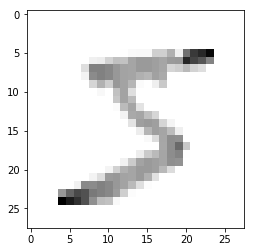

In [0]:
model.save('epic_num_reader.model')
new_model= tf.keras.models.load_model('epic_num_reader.model')
predictions= new_model.predict(x_test)
print(predictions)

[[6.3715532e-08 1.1241688e-06 5.3886539e-05 ... 9.9721211e-01
  2.3235600e-07 7.3068162e-07]
 [1.1763462e-08 2.4286474e-04 9.9974710e-01 ... 1.3853575e-09
  6.5305778e-07 1.2045117e-11]
 [7.3758962e-08 9.9976450e-01 3.7098810e-06 ... 3.3515455e-05
  1.7985037e-04 1.6665552e-07]
 ...
 [4.5868309e-09 7.1289878e-07 6.8738679e-08 ... 2.9312914e-05
  1.9378099e-06 6.3063938e-04]
 [2.0672917e-07 1.7519035e-08 5.6774532e-09 ... 4.6814632e-09
  2.2070919e-05 1.4748034e-08]
 [3.0003073e-09 1.4732637e-08 2.3566948e-08 ... 7.5258785e-11
  5.5739172e-08 8.4714441e-10]]


In [0]:
import numpy as np
print(np.argmax(predictions[2]))

1


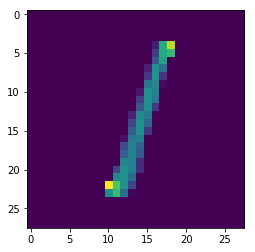

In [0]:
plt.imshow(x_test[2])
plt.show()

#Fashion(https://www.tensorflow.org/tutorials/keras/basic_classification)



In [0]:
# basic classification

from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_name = ['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
train_images.shape
len(train_labels)
train_labels

test_images.shape
len(train_labels)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0


In [0]:
plt.figure(figsize= (10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels,epochs = 5)

In [0]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('test_accuracy: ',test_acc)

In [0]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                      100*np.max(predictions_array),
                                      class_name[true_label]),
                                      color = color)
  
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label =np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [0]:
i =1
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [0]:
i  = 17
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

#text classification

In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)
# imdb = keras.datasets.imdb
imdb = keras.datasets.imdb
# (train_data,train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("training entries: {}, label:{}".format(len(train_data,train_labels)))

1.13.1


ValueError: ignored

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

1.13.1


ValueError: ignored

In [0]:
pip install f
from flask import *  
from flask_mail import *  
  
app = Flask(__name__)  
  
#Flask mail configuration  
app.config['MAIL_SERVER']='smtp.gmail.com'  
app.config['MAIL_PORT']=465  
app.config['MAIL_USERNAME'] = 'admin@gmail.com'  
app.config['MAIL_PASSWORD'] = '******'  
app.config['MAIL_USE_TLS'] = False  
app.config['MAIL_USE_SSL'] = True  
  
#instantiate the Mail class  
mail = Mail(app)  
  
#configure the Message class object and send the mail from a URL  
@app.route('/')  
def index():  
    msg = Message('subject', sender = 'admin@gmail.com', recipients=['username@gmail.com'])  
    msg.body = 'hi, this is the mail sent by using the flask web application'  
    return "Mail Sent, Please check the mail id"  
  
if __name__ == '__main__':  
    app.run(debug = True)  

ModuleNotFoundError: ignored

In [0]:
//Globals
int nextConnectionNo = 1000;
Population pop;
int frameSpeed = 60;


boolean showBestEachGen = false;
int upToGen = 0;
Player genPlayerTemp;

boolean showNothing = false;


//images
PImage dinoRun1;
PImage dinoRun2;
PImage dinoJump;
PImage dinoDuck;
PImage dinoDuck1;
PImage smallCactus;
PImage manySmallCactus;
PImage bigCactus;
PImage bird;
PImage bird1;


ArrayList<Obstacle> obstacles = new ArrayList<Obstacle>();
ArrayList<Bird> birds = new ArrayList<Bird>();
ArrayList<Ground> grounds = new ArrayList<Ground>();


int obstacleTimer = 0;
int minimumTimeBetweenObstacles = 60;
int randomAddition = 0;
int groundCounter = 0;
float speed = 10;

int groundHeight = 250;
int playerXpos = 150;

ArrayList<Integer> obstacleHistory = new ArrayList<Integer>();
ArrayList<Integer> randomAdditionHistory = new ArrayList<Integer>();



//--------------------------------------------------------------------------------------------------------------------------------------------------

void setup() {

  frameRate(60);
  fullScreen();
  dinoRun1 = loadImage("dinorun0000.png");
  dinoRun2 = loadImage("dinorun0001.png");
  dinoJump = loadImage("dinoJump0000.png");
  dinoDuck = loadImage("dinoduck0000.png");
  dinoDuck1 = loadImage("dinoduck0001.png");

  smallCactus = loadImage("cactusSmall0000.png");
  bigCactus = loadImage("cactusBig0000.png");
  manySmallCactus = loadImage("cactusSmallMany0000.png");
  bird = loadImage("berd.png");
  bird1 = loadImage("berd2.png");

  pop = new Population(500); //<<number of dinosaurs in each generation
}
//--------------------------------------------------------------------------------------------------------------------------------------------------------
void draw() {
  drawToScreen();
  if (showBestEachGen) {//show the best of each gen
    if (!genPlayerTemp.dead) {//if current gen player is not dead then update it
      genPlayerTemp.updateLocalObstacles();
      genPlayerTemp.look();
      genPlayerTemp.think();
      genPlayerTemp.update();
      genPlayerTemp.show();
    } else {//if dead move on to the next generation
      upToGen ++;
      if (upToGen >= pop.genPlayers.size()) {//if at the end then return to the start and stop doing it
        upToGen= 0;
        showBestEachGen = false;
      } else {//if not at the end then get the next generation
        genPlayerTemp = pop.genPlayers.get(upToGen).cloneForReplay();
      }
    }
  } else {//if just evolving normally
    if (!pop.done()) {//if any players are alive then update them
      updateObstacles();
      pop.updateAlive();
    } else {//all dead
      //genetic algorithm 
      pop.naturalSelection();
      resetObstacles();
    }
  }
}



//---------------------------------------------------------------------------------------------------------------------------------------------------------
//draws the display screen
void drawToScreen() {
  if (!showNothing) {
    background(250); 
    stroke(0);
    strokeWeight(2);
    line(0, height - groundHeight - 30, width, height - groundHeight - 30);
    drawBrain();
    writeInfo();
  }
}
//-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
void drawBrain() {  //show the brain of whatever genome is currently showing
  int startX = 600;
  int startY = 10;
  int w = 600;
  int h = 400;
  if (showBestEachGen) {
    genPlayerTemp.brain.drawGenome(startX, startY, w, h);
  } else {
    for (int i = 0; i< pop.pop.size(); i++) {
      if (!pop.pop.get(i).dead) {
        pop.pop.get(i).brain.drawGenome(startX, startY, w, h);
        break;
      }
    }
  }
}
//-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
//writes info about the current player
void writeInfo() {
  fill(200);
  textAlign(LEFT);
  textSize(40);
  if (showBestEachGen) { //if showing the best for each gen then write the applicable info
    text("Score: " + genPlayerTemp.score, 30, height - 30);
    //text(, width/2-180, height-30);
    textAlign(RIGHT);
    text("Gen: " + (genPlayerTemp.gen +1), width -40, height-30);
    textSize(20);
    int x = 580;
    text("Distace to next obstacle", x, 18+44.44444);
    text("Height of obstacle", x, 18+2*44.44444);
    text("Width of obstacle", x, 18+3*44.44444);
    text("Bird height", x, 18+4*44.44444);
    text("Speed", x, 18+5*44.44444);
    text("Players Y position", x, 18+6*44.44444);
    text("Gap between obstacles", x, 18+7*44.44444);
    text("Bias", x, 18+8*44.44444);

    textAlign(LEFT);
    text("Small Jump", 1220, 118);
    text("Big Jump", 1220, 218);
    text("Duck", 1220, 318);
  } else { //evolving normally 
    text("Score: " + floor(pop.populationLife/3.0), 30, height - 30);
    //text(, width/2-180, height-30);
    textAlign(RIGHT);

    text("Gen: " + (pop.gen +1), width -40, height-30);
    textSize(20);
    int x = 580;
    text("Distace to next obstacle", x, 18+44.44444);
    text("Height of obstacle", x, 18+2*44.44444);
    text("Width of obstacle", x, 18+3*44.44444);
    text("Bird height", x, 18+4*44.44444);
    text("Speed", x, 18+5*44.44444);
    text("Players Y position", x, 18+6*44.44444);
    text("Gap between obstacles", x, 18+7*44.44444);
    text("Bias", x, 18+8*44.44444);

    textAlign(LEFT);
    text("Small Jump", 1220, 118);
    text("Big Jump", 1220, 218);
    text("Duck", 1220, 318);
  }
}


//--------------------------------------------------------------------------------------------------------------------------------------------------

void keyPressed() {
  switch(key) {
  case '+'://speed up frame rate
    frameSpeed += 10;
    frameRate(frameSpeed);
    println(frameSpeed);
    break;
  case '-'://slow down frame rate
    if (frameSpeed > 10) {
      frameSpeed -= 10;
      frameRate(frameSpeed);
      println(frameSpeed);
    }
    break;
  case 'g'://show generations
    showBestEachGen = !showBestEachGen;
    upToGen = 0;
    genPlayerTemp = pop.genPlayers.get(upToGen).cloneForReplay();
    break;
  case 'n'://show absolutely nothing in order to speed up computation
    showNothing = !showNothing;
    break;
  case CODED://any of the arrow keys
    switch(keyCode) {
    case RIGHT://right is used to move through the generations
      if (showBestEachGen) {//if showing the best player each generation then move on to the next generation
        upToGen++;
        if (upToGen >= pop.genPlayers.size()) {//if reached the current generation then exit out of the showing generations mode
          showBestEachGen = false;
        } else {
          genPlayerTemp = pop.genPlayers.get(upToGen).cloneForReplay();
        }
        break;
      }
      break;
    }
  }
}
//---------------------------------------------------------------------------------------------------------------------------------------------------------
//called every frame
void updateObstacles() {
  obstacleTimer ++;
  speed += 0.002;
  if (obstacleTimer > minimumTimeBetweenObstacles + randomAddition) { //if the obstacle timer is high enough then add a new obstacle
    addObstacle();
  }
  groundCounter ++;
  if (groundCounter> 10) { //every 10 frames add a ground bit
    groundCounter =0;
    grounds.add(new Ground());
  }

  moveObstacles();//move everything
  if (!showNothing) {//show everything
    showObstacles();
  }
}

//---------------------------------------------------------------------------------------------------------------------------------------------------------
//moves obstacles to the left based on the speed of the game 
void moveObstacles() {
  println(speed);
  for (int i = 0; i< obstacles.size(); i++) {
    obstacles.get(i).move(speed);
    if (obstacles.get(i).posX < -playerXpos) { 
      obstacles.remove(i);
      i--;
    }
  }

  for (int i = 0; i< birds.size(); i++) {
    birds.get(i).move(speed);
    if (birds.get(i).posX < -playerXpos) {
      birds.remove(i);
      i--;
    }
  }
  for (int i = 0; i < grounds.size(); i++) {
    grounds.get(i).move(speed);
    if (grounds.get(i).posX < -playerXpos) {
      grounds.remove(i);
      i--;
    }
  }
}
//------------------------------------------------------------------------------------------------------------------------------------------------------------
//every so often add an obstacle 
void addObstacle() {
  int lifespan = pop.populationLife;
  int tempInt;
  if (lifespan > 1000 && random(1) < 0.15) { // 15% of the time add a bird
    tempInt = floor(random(3));
    Bird temp = new Bird(tempInt);//floor(random(3)));
    birds.add(temp);
  } else {//otherwise add a cactus
    tempInt = floor(random(3));
    Obstacle temp = new Obstacle(tempInt);//floor(random(3)));
    obstacles.add(temp);
    tempInt+=3;
  }
  obstacleHistory.add(tempInt);

  randomAddition = floor(random(50));
  randomAdditionHistory.add(randomAddition);
  obstacleTimer = 0;
}
//---------------------------------------------------------------------------------------------------------------------------------------------------------
//what do you think this does?
void showObstacles() {
  for (int i = 0; i< grounds.size(); i++) {
    grounds.get(i).show();
  }
  for (int i = 0; i< obstacles.size(); i++) {
    obstacles.get(i).show();
  }

  for (int i = 0; i< birds.size(); i++) {
    birds.get(i).show();
  }
}

//-------------------------------------------------------------------------------------------------------------------------------------------
//resets all the obstacles after every dino has died
void resetObstacles() {
  randomAdditionHistory = new ArrayList<Integer>();
  obstacleHistory = new ArrayList<Integer>();

  obstacles = new ArrayList<Obstacle>();
  birds = new ArrayList<Bird>();
  obstacleTimer = 0;
  randomAddition = 0;
  groundCounter = 0;
  speed = 10;
}

#game

In [0]:

from keras.models import Sequential      # One layer after the other
from keras.layers import Dense, Flatten  # Dense layers are fully connected layers, Flatten layers flatten out multidimensional inputs
from collections import deque            # For storing moves 

import numpy as np
import gym                                # To train our network
env = gym.make('MountainCar-v0')          # Choose game (any in the gym should work)

import random     # For sampling batches from the observations


# Create network. Input is two consecutive game states, output is Q-values of the possible moves.
model = Sequential()
model.add(Dense(20, input_shape=(2,) + env.observation_space.shape, init='uniform', activation='relu'))
model.add(Flatten())       # Flatten input so as to have no problems with processing
model.add(Dense(18, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(env.action_space.n, init='uniform', activation='linear'))    # Same number of outputs as possible actions

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Parameters
D = deque()                                # Register where the actions will be stored

observetime = 500                          # Number of timesteps we will be acting on the game and observing results
epsilon = 0.7                              # Probability of doing a random move
gamma = 0.9                                # Discounted future reward. How much we care about steps further in time
mb_size = 50                               # Learning minibatch size

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_shape=(2, 2), activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="linear", kernel_initializer="uniform")`


In [0]:
# FIRST STEP: Knowing what each action does (Observing)

observation = env.reset()                     # Game begins
obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
state = np.stack((obs, obs), axis=1)
done = False
for t in range(observetime):
    if np.random.rand() <= epsilon:
        action = np.random.randint(0, env.action_space.n, size=1)[0]
    else:
        Q = model.predict(state)          # Q-values predictions
        action = np.argmax(Q)             # Move with highest Q-value is the chosen one
    observation_new, reward, done, info = env.step(action)     # See state of the game, reward... after performing the action
    obs_new = np.expand_dims(observation_new, axis=0)          # (Formatting issues)
    state_new = np.append(np.expand_dims(obs_new, axis=0), state[:, :1, :], axis=1)     # Update the input with the new state of the game
    D.append((state, action, reward, state_new, done))         # 'Remember' action and consequence
    state = state_new         # Update state
    if done:
        env.reset()           # Restart game if it's finished
        obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
        state = np.stack((obs, obs), axis=1)
print('Observing Finished')

Observing Finished


In [0]:
# SECOND STEP: Learning from the observations (Experience replay)

minibatch = random.sample(D, mb_size)                              # Sample some moves

inputs_shape = (mb_size,) + state.shape[1:]
inputs = np.zeros(inputs_shape)
targets = np.zeros((mb_size, env.action_space.n))

for i in range(0, mb_size):
    state = minibatch[i][0]
    action = minibatch[i][1]
    reward = minibatch[i][2]
    state_new = minibatch[i][3]
    done = minibatch[i][4]
    
# Build Bellman equation for the Q function
    inputs[i:i+1] = np.expand_dims(state, axis=0)
    targets[i] = model.predict(state)
    Q_sa = model.predict(state_new)
    
    if done:
        targets[i, action] = reward
    else:
        targets[i, action] = reward + gamma * np.max(Q_sa)

# Train network to output the Q function
    model.train_on_batch(inputs, targets)
print('Learning Finished')

In [0]:
#!/usr/bin/env python
from __future__ import print_function

import sys, gym, time

#
# Test yourself as a learning agent! Pass environment name as a command-line argument, for example:
#
# python keyboard_agent.py SpaceInvadersNoFrameskip-v4
#

env = gym.make('LunarLander-v2' if len(sys.argv)<2 else sys.argv[1])

if not hasattr(env.action_space, 'n'):
    raise Exception('Keyboard agent only supports discrete action spaces')
ACTIONS = env.action_space.n
SKIP_CONTROL = 0    # Use previous control decision SKIP_CONTROL times, that's how you
                    # can test what skip is still usable.

human_agent_action = 0
human_wants_restart = False
human_sets_pause = False

def key_press(key, mod):
    global human_agent_action, human_wants_restart, human_sets_pause
    if key==0xff0d: human_wants_restart = True
    if key==32: human_sets_pause = not human_sets_pause
    a = int( key - ord('0') )
    if a <= 0 or a >= ACTIONS: return
    human_agent_action = a

def key_release(key, mod):
    global human_agent_action
    a = int( key - ord('0') )
    if a <= 0 or a >= ACTIONS: return
    if human_agent_action == a:
        human_agent_action = 0

env.render()
env.unwrapped.viewer.window.on_key_press = key_press
env.unwrapped.viewer.window.on_key_release = key_release

def rollout(env):
    global human_agent_action, human_wants_restart, human_sets_pause
    human_wants_restart = False
    obser = env.reset()
    skip = 0
    total_reward = 0
    total_timesteps = 0
    while 1:
        if not skip:
            #print("taking action {}".format(human_agent_action))
            a = human_agent_action
            total_timesteps += 1
            skip = SKIP_CONTROL
        else:
            skip -= 1

        obser, r, done, info = env.step(a)
        if r != 0:
            print("reward %0.3f" % r)
        total_reward += r
        window_still_open = env.render()
        if window_still_open==False: return False
        if done: break
        if human_wants_restart: break
        while human_sets_pause:
            env.render()
            time.sleep(0.1)
        time.sleep(0.1)
    print("timesteps %i reward %0.2f" % (total_timesteps, total_reward))

print("ACTIONS={}".format(ACTIONS))
print("Press keys 1 2 3 ... to take actions 1 2 3 ...")
print("No keys pressed is taking action 0")

while 1:
    window_still_open = rollout(env)
    if window_still_open==False: break
